In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import zipfile

local_zip = '/content/drive/My Drive/My Programs/3class.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp2/')
zip_ref.close()

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp2/Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/tmp2/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size = 256
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size= 64
)

Found 9358 images belonging to 3 classes.
Found 2338 images belonging to 3 classes.


In [0]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [49]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.6):
      print('\nReached ^50%')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 36,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 36,
    callbacks=[callbacks]
)

Epoch 1/100
36/36 [==============================] - 52s 1s/step - loss: 2.1252 - acc: 0.3823 - val_loss: 1.0993 - val_acc: 0.3993
Epoch 2/100
36/36 [==============================] - 51s 1s/step - loss: 1.0793 - acc: 0.4124 - val_loss: 1.1616 - val_acc: 0.3394
Epoch 3/100
36/36 [==============================] - 51s 1s/step - loss: 1.0688 - acc: 0.4303 - val_loss: 1.0569 - val_acc: 0.4553
Epoch 4/100
36/36 [==============================] - 51s 1s/step - loss: 1.0560 - acc: 0.4377 - val_loss: 1.0419 - val_acc: 0.4518
Epoch 5/100
36/36 [==============================] - 51s 1s/step - loss: 1.0565 - acc: 0.4409 - val_loss: 1.0564 - val_acc: 0.4388
Epoch 6/100
36/36 [==============================] - 51s 1s/step - loss: 1.0481 - acc: 0.4550 - val_loss: 1.0399 - val_acc: 0.4440
Epoch 7/100
36/36 [==============================] - 51s 1s/step - loss: 1.0349 - acc: 0.4667 - val_loss: 1.0397 - val_acc: 0.4557
Epoch 8/100
36/36 [==============================] - 51s 1s/step - loss: 1.0356 - a

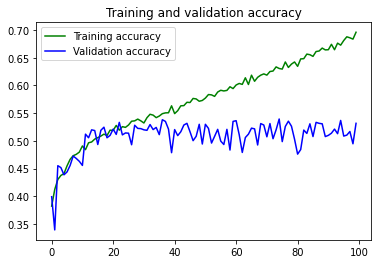

<Figure size 432x288 with 0 Axes>

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('plot2.png')
plt.legend(loc=0)
plt.figure()
plt.show()

In [73]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=256)
  print(classes)

Saving Littleman(2006).jpg to Littleman(2006).jpg
[[0. 1. 0.]]
